In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from PIL import Image
import seaborn as sns
from datetime import datetime,date

In [205]:
elon1 = pd.read_csv(r'../data/elon/ElonTweets(Sentiment).csv')

In [3]:
elon1.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]"
1,1,1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]"
2,2,2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]"
3,3,3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]"
4,4,4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]"


In [4]:
elon2 = pd.read_csv(r'../data/elon/ElonTweets(Sentiment) 10-28-22.csv')

In [5]:
elon2.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,0,2022-10-28 03:49:11+00:00,1585841080431321088,the bird is freed,elonmusk,Twitter HQ,57663,128631,730472,en,Twitter for iPhone,110553384,122,True,2022-10-28,_,"['positive', 0.70848316]"
1,1,1,1,2022-10-28 01:50:49+00:00,1585811291851018241,Falcon rockets to orbit as seen from LA https:...,elonmusk,Twitter HQ,6857,16499,189436,en,Twitter for iPhone,110553384,122,True,2022-10-28,_,"['neutral', 0.90077394]"
2,2,2,2,2022-10-27 21:45:47+00:00,1585749627365515266,@Gfilche @Twitter 🤣,elonmusk,Twitter HQ,632,246,7052,und,Twitter for iPhone,110553384,122,True,2022-10-27,"Gfilche,Twitter","['neutral', 0.5714027]"
3,3,3,3,2022-10-27 16:17:39+00:00,1585667048020901888,@PeterSchiff 🤣 thanks,elonmusk,Twitter HQ,670,420,17577,en,Twitter for iPhone,110553384,122,True,2022-10-27,PeterSchiff,"['positive', 0.78971434]"
4,4,4,4,2022-10-27 13:19:25+00:00,1585622194696044544,@ZubyMusic Absolutely,elonmusk,Twitter HQ,1281,1152,42896,en,Twitter for iPhone,110553384,122,True,2022-10-27,ZubyMusic,"['neutral', 0.5287457]"


In [6]:
elon3 = pd.read_csv(r'../data/elon/ElonTweets(Sentiment)_11-9-22.csv')

In [7]:
elon3.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,2022-11-10 01:38:32+00:00,1590519242805641216,"@micsolana In days to come, we’ll add granular...",elonmusk,NaN,348,133,1557,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.7305445]"
1,1,1,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.58761513]"
2,2,2,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,True,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]"
3,3,3,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,True,2022-11-09,StarringShane,"['positive', 0.47260958]"
4,4,4,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,True,2022-11-09,PPathole,"['neutral', 0.82402253]"


In [11]:
elon = pd.concat([elon1, elon2, elon3], ignore_index=True)

In [12]:
elon.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,Unnamed: 0.2
0,0,0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,True,2022-09-29,MuskUniversity,"['neutral', 0.6005306]",NaN
1,1,1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['neutral', 0.8452575]",NaN
2,2,2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,True,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]",NaN
3,3,3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,True,2022-09-29,_,"['positive', 0.6118259]",NaN
4,4,4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,True,2022-09-29,phibetakitten,"['neutral', 0.85970926]",NaN


In [14]:
elon.sort_values('Datetime', ascending=False)

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment,Unnamed: 0.2
35047,0,0,2022-11-10 01:38:32+00:00,1590519242805641216,"@micsolana In days to come, we’ll add granular...",elonmusk,NaN,348,133,1557,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.7305445]",NaN
35048,1,1,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,True,2022-11-10,micsolana,"['neutral', 0.58761513]",NaN
35049,2,2,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,True,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]",NaN
35050,3,3,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,True,2022-11-09,StarringShane,"['positive', 0.47260958]",NaN
35051,4,4,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,True,2022-11-09,PPathole,"['neutral', 0.82402253]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35045,17443,17443,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,Twitter HQ,33,22,188,en,Twitter Web Client,110555351,122,True,2011-12-01,_,"['positive', 0.9733198]",17443.0
52764,17717,17717,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,115242467,130,True,2011-12-01,_,"['positive', 0.9733198]",NaN
17601,17601,17601,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,NaN,967,559,6030,en,Twitter Web Client,107415714,122,True,2010-06-04,_,"['neutral', 0.5472165]",NaN
35046,17444,17444,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,Twitter HQ,988,558,6023,en,Twitter Web Client,110555351,122,True,2010-06-04,_,"['neutral', 0.5472165]",17444.0


In [31]:
# del elon['Unnamed: 0']
# del elon['Unnamed: 0.1']
# del elon['Unnamed: 0.2']
# del elon['verified']

In [32]:
elon

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment
0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,2022-09-29,MuskUniversity,"['neutral', 0.6005306]"
1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['neutral', 0.8452575]"
2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]"
3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['positive', 0.6118259]"
4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,2022-09-29,phibetakitten,"['neutral', 0.85970926]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52761,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,28,9,52,en,Twitter for iPhone,115242467,130,2011-12-03,_,"['negative', 0.5067324]"
52762,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,32,30,66,en,Twitter for iPhone,115242467,130,2011-12-03,_,"['positive', 0.55860823]"
52763,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,76,en,Twitter Web Client,115242467,130,2011-12-01,_,"['neutral', 0.6384011]"
52764,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,115242467,130,2011-12-01,_,"['positive', 0.9733198]"


In [37]:
elon.loc[elon['Tweet Id'] == 142179928203460608].iloc[0]['Text']

"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"

In [42]:
elon.drop_duplicates(subset='Tweet Id', inplace=True)

In [45]:
elon.loc[elon['Tweet Id'] == 142179928203460608]

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment
17600,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,2011-12-01,_,"['positive', 0.9733198]"


In [104]:
text = " ".join(t for t in elon.Text)
text = re.sub(r'http\S+', '', text)
text = re.sub(r'amp\S+', '', text)
text = re.sub(r'@\S+', '', text)

In [105]:
stopwords = set(STOPWORDS)
word_cloud = WordCloud(collocations = False, stopwords=stopwords, background_color = 'white').generate(text)


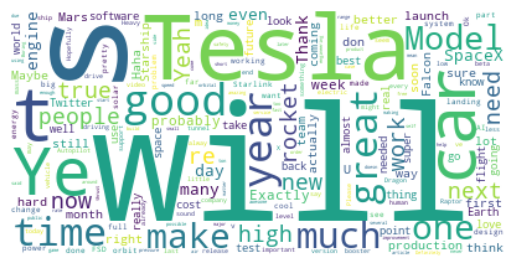

In [106]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

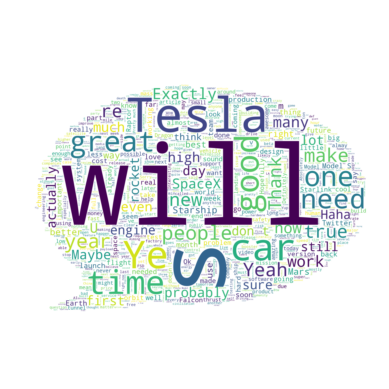

In [112]:
mask = np.array(Image.open("./text_bubble.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(text)
# create twitter image
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
# plt.savefig("wordcloud.png", format="png")
plt.show()

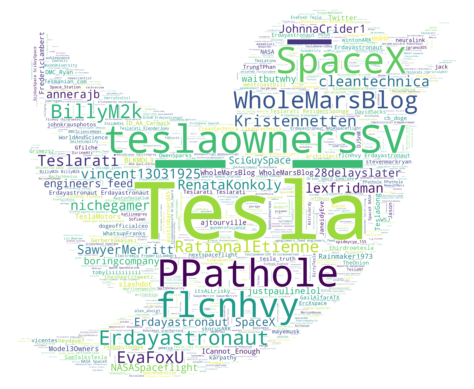

In [166]:
mask = np.array(Image.open("./twitter_logo.png"))
mentions = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(" ".join(elon['mentions']))
# create twitter image
plt.figure()
plt.imshow(mentions, interpolation="bilinear")
plt.axis("off")
# store to file
# plt.savefig("wordcloud.png", format="png")
plt.show()

In [108]:
elon['pos_neg_neu'] = elon[['sentiment']].applymap(lambda str: str.split(",")[0])

In [109]:
elon[['pos_neg_neu']] = elon[['pos_neg_neu']].applymap(lambda str: str.replace("'", ""))
elon[['pos_neg_neu']] = elon[['pos_neg_neu']].applymap(lambda str: str.replace("[", ""))

In [110]:
elon.head()

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment,pos_neg_neu
0,2022-09-29 20:22:46+00:00,1575581872913907712,@MuskUniversity True,elonmusk,NaN,377,127,3007,en,Twitter for iPhone,107414837,122,2022-09-29,MuskUniversity,"['neutral', 0.6005306]",neutral
1,2022-09-29 15:35:09+00:00,1575509494510993408,Needs be able to get from Starbase to South Pa...,elonmusk,NaN,1604,1416,33556,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['neutral', 0.8452575]",neutral
2,2022-09-29 15:32:42+00:00,1575508878300618752,@WholeMarsBlog Off-label use 🤣,elonmusk,NaN,754,492,23482,en,Twitter for iPhone,107414837,122,2022-09-29,WholeMarsBlog,"['neutral', 0.7530303]",neutral
3,2022-09-29 15:31:12+00:00,1575508498430820352,Cybertruck will be waterproof enough to serve ...,elonmusk,NaN,12870,9732,124276,en,Twitter for iPhone,107414837,122,2022-09-29,_,"['positive', 0.6118259]",positive
4,2022-09-29 15:28:10+00:00,1575507735298207744,@phibetakitten Submarines use electric motors ...,elonmusk,NaN,509,347,8189,en,Twitter for iPhone,107414837,122,2022-09-29,phibetakitten,"['neutral', 0.85970926]",neutral


In [123]:
elon[['pos_neg_neu']].value_counts()

pos_neg_neu
neutral        10714
positive        5459
negative        2162
dtype: int64

In [145]:
sentiment = elon.pivot_table(index='pos_neg_neu', aggfunc='count')[['sentiment']]
sentiment.reset_index(inplace=True)
sentiment

,pos_neg_neu,sentiment
0,negative,2162
1,neutral,10714
2,positive,5459


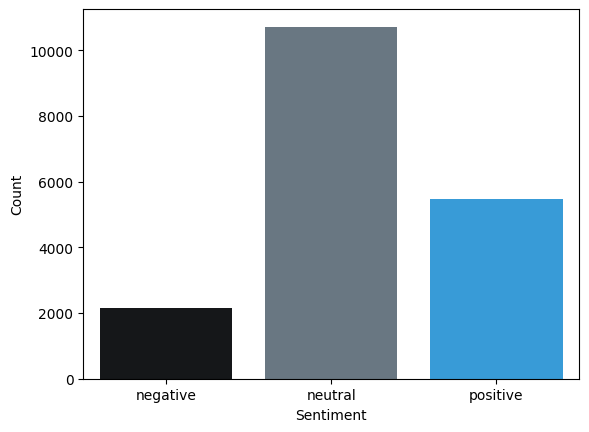

In [165]:
colors = ["#14171A", "#657786", "#1DA1F2"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(sentiment, y='sentiment', x='pos_neg_neu')
plt.xlabel("Sentiment")
plt.ylabel("Count");

In [188]:
elon['Date'].max()

'2022-11-10'

In [192]:
datetime.strptime(elon['Date'].max(), '%Y-%m-%d')

datetime.datetime(2022, 11, 10, 0, 0)

In [206]:
elon['Date'] = elon[['Date']].applymap(lambda datestr: pd.to_datetime(datestr))

In [218]:
elon_use = elon.loc[(elon['Date'] > np.datetime64(date(2020,10,10))) & (elon['Date'] < np.datetime64(date(2020,11,10)))]

In [219]:
elon_use.sort_values('Date')

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment,pos_neg_neu
6500,2020-10-11 04:39:26+00:00,1315149991061512193,@Erdayastronaut @flcnhvy @PelleBrannvall @Neop...,elonmusk,NaN,167,211,4193,en,Twitter for iPhone,107413276,122,2020-10-11,"Erdayastronaut,flcnhvy,PelleBrannvall,Neopork8...","['positive', 0.7226765]",positive
6495,2020-10-11 23:40:49+00:00,1315437229263724545,@flcnhvy Definitely,elonmusk,NaN,165,114,4230,en,Twitter for iPhone,107413276,122,2020-10-11,flcnhvy,"['neutral', 0.4964814]",neutral
6496,2020-10-11 23:39:32+00:00,1315436905199284226,@enn_nafnlaus Exactly. He plays the “poor inve...,elonmusk,NaN,102,137,1843,en,Twitter for iPhone,107413276,122,2020-10-11,enn_nafnlaus,"['negative', 0.64120126]",negative
6499,2020-10-11 19:18:35+00:00,1315371232968105984,@Carrenimfa Interesting,elonmusk,NaN,544,634,17900,en,Twitter for iPhone,107413276,122,2020-10-11,Carrenimfa,"['positive', 0.511146]",positive
6498,2020-10-11 20:33:17+00:00,1315390031851257856,@enn_nafnlaus When Eberhard was fired from the...,elonmusk,NaN,164,274,6441,en,Twitter for iPhone,107413276,122,2020-10-11,enn_nafnlaus,"['negative', 0.68260556]",negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,2020-11-09 02:16:15+00:00,1325623206049280000,@Model3Owners @MKBHD Sure,elonmusk,NaN,62,21,1164,en,Twitter for iPhone,107413183,122,2020-11-09,"Model3Owners,MKBHD","['neutral', 0.59739053]",neutral
6280,2020-11-09 02:13:16+00:00,1325622453054312450,"@MKBHD Actually, it’s still there https://t.co...",elonmusk,NaN,109,68,4213,en,Twitter for iPhone,107413183,122,2020-11-09,MKBHD,"['neutral', 0.8056771]",neutral
6281,2020-11-09 01:55:55+00:00,1325618085445824513,@Ed_Spartan_117 @Tesla @NYKChannel Wait until ...,elonmusk,NaN,270,248,4531,en,Twitter for iPhone,107413183,122,2020-11-09,"Ed_Spartan_117,Tesla,NYKChannel","['neutral', 0.8179349]",neutral
6275,2020-11-09 15:39:20+00:00,1325825307824189441,@teslaownerssv @Tesla Thanks to a lot of great...,elonmusk,NaN,168,126,3062,en,Twitter for iPhone,107413183,122,2020-11-09,"teslaownerssv,Tesla","['positive', 0.98180836]",positive


In [220]:
likes = elon_use.pivot_table(index='Date', aggfunc='sum')[['like count']]
retweets = elon_use.pivot_table(index='Date', aggfunc='sum')[['retweet count']]
replies = elon_use.pivot_table(index='Date', aggfunc='sum')[['reply count']]

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/3222390102.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  likes = elon_use.pivot_table(index='Date', aggfunc='sum')[['like count']]
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/3222390102.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retweets = elon_use.pivot_table(index='Date', aggfunc='sum')[['retweet count']]
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/3222390102.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only wi

In [258]:
lrr = likes.join([retweets, replies])
means = lrr.mean()
pd.DataFrame(lrr.mean(), columns=['Means'])

,Means
like count,142632.433333
retweet count,8332.666667
reply count,4692.733333


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/2578602720.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  lrr.aggregate('mean')


like count       142632.433333
retweet count      8332.666667
reply count        4692.733333
dtype: float64

In [234]:

first_like = likes.sort_values('Date').iloc[0]
last_like = likes.sort_values('Date').iloc[-1]

first_rt = retweets.sort_values('Date').iloc[0]
last_rt = retweets.sort_values('Date').iloc[-1]

first_rp = replies.sort_values('Date').iloc[0]
last_rp = replies.sort_values('Date').iloc[-1]

In [246]:
int(first_like.values)

35703

In [263]:
int(retweets.sort_values('Date').iloc[0:20].mean().values)


8105

In [265]:
likes = elon.pivot_table(index='pos_neg_neu', aggfunc='sum')[['like count']]
retweets = elon.pivot_table(index='pos_neg_neu', aggfunc='sum')[['retweet count']]
replies = elon.pivot_table(index='pos_neg_neu', aggfunc='sum')[['reply count']]
lrr = likes.join([retweets, replies])

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/2601880875.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  likes = elon.pivot_table(index='pos_neg_neu', aggfunc='sum')[['like count']]
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/2601880875.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retweets = elon.pivot_table(index='pos_neg_neu', aggfunc='sum')[['retweet count']]
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_29721/2601880875.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_o

In [266]:
lrr

,like count,retweet count,reply count
pos_neg_neu,,,
negative,92353864,9605368,5643984
neutral,364642388,33329188,18739918
positive,162621331,13471891,7938604


In [267]:
elon = elon.sort_values(by='Datetime')
elon

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment,pos_neg_neu
17601,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,NaN,967,559,6030,en,Twitter Web Client,107415714,122,2010-06-04,_,"['neutral', 0.5472165]",neutral
17600,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,2011-12-01,_,"['positive', 0.9733198]",positive
17599,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,74,en,Twitter Web Client,107415763,122,2011-12-01,_,"['neutral', 0.6384011]",neutral
17598,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,23,29,50,en,Twitter for iPhone,107415763,122,2011-12-03,_,"['positive', 0.55860823]",positive
17597,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,27,9,50,en,Twitter for iPhone,107415763,122,2011-12-03,_,"['negative', 0.5067324]",negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35051,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,2022-11-09,PPathole,"['neutral', 0.82402253]",neutral
35050,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,2022-11-09,StarringShane,"['positive', 0.47260958]",positive
35049,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]",positive
35048,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,2022-11-10,micsolana,"['neutral', 0.58761513]",neutral


In [271]:
elon['AccuSenti'] = 0

In [280]:
elon.iloc[4]['pos_neg_neu'] == 'negative'

True

In [281]:
elon.iloc[4]['AccuSenti'] 

0

In [288]:
acculist = np.zeros(len(elon))
for i in range(1, len(elon)):
    if elon.iloc[i-1]['pos_neg_neu'] == 'negative':
        acculist[i] = acculist[i-1] - 1
    if elon.iloc[i-1]['pos_neg_neu'] == 'positive':
        acculist[i] = acculist[i-1] + 1
    if elon.iloc[i-1]['pos_neg_neu'] == 'neutral':
        acculist[i] = acculist[i-1]



In [289]:
elon['AccuSenti']= acculist

In [290]:
elon

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment,pos_neg_neu,AccuSenti
17601,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,NaN,967,559,6030,en,Twitter Web Client,107415714,122,2010-06-04,_,"['neutral', 0.5472165]",neutral,0.0
17600,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,2011-12-01,_,"['positive', 0.9733198]",positive,0.0
17599,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,74,en,Twitter Web Client,107415763,122,2011-12-01,_,"['neutral', 0.6384011]",neutral,1.0
17598,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,23,29,50,en,Twitter for iPhone,107415763,122,2011-12-03,_,"['positive', 0.55860823]",positive,1.0
17597,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,27,9,50,en,Twitter for iPhone,107415763,122,2011-12-03,_,"['negative', 0.5067324]",negative,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35051,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,2022-11-09,PPathole,"['neutral', 0.82402253]",neutral,3295.0
35050,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,2022-11-09,StarringShane,"['positive', 0.47260958]",positive,3295.0
35049,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]",positive,3296.0
35048,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,2022-11-10,micsolana,"['neutral', 0.58761513]",neutral,3297.0


In [294]:
elon.pos_neg_neu.value_counts()

neutral     10714
positive     5459
negative     2162
Name: pos_neg_neu, dtype: int64

In [300]:
elon.reset_index(inplace=True)
del elon['index']
elon

,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,Date,mentions,sentiment,pos_neg_neu,AccuSenti
0,2010-06-04 18:31:57+00:00,15434727182,"Please ignore prior tweets, as that was someon...",elonmusk,NaN,967,559,6030,en,Twitter Web Client,107415714,122,2010-06-04,_,"['neutral', 0.5472165]",neutral,0.0
1,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk,NaN,33,22,189,en,Twitter Web Client,107415714,122,2011-12-01,_,"['positive', 0.9733198]",positive,0.0
2,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk,NaN,29,13,74,en,Twitter Web Client,107415763,122,2011-12-01,_,"['neutral', 0.6384011]",neutral,1.0
3,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk,NaN,23,29,50,en,Twitter for iPhone,107415763,122,2011-12-03,_,"['positive', 0.55860823]",positive,1.0
4,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk,NaN,27,9,50,en,Twitter for iPhone,107415763,122,2011-12-03,_,"['negative', 0.5067324]",negative,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18330,2022-11-09 19:29:02+00:00,1590426255018848256,@PPathole The goal of Twitter DMs is to supers...,elonmusk,NaN,1001,513,10904,en,Twitter for iPhone,115241851,130,2022-11-09,PPathole,"['neutral', 0.82402253]",neutral,3295.0
18331,2022-11-09 23:04:29+00:00,1590480472613998593,@StarringShane Subscription Blue is better tha...,elonmusk,NaN,2253,1041,17872,en,Twitter for iPhone,115241851,130,2022-11-09,StarringShane,"['positive', 0.47260958]",positive,3295.0
18332,2022-11-09 23:14:53+00:00,1590483090367197185,@guslabu @tomwarren 🎯😎💰,elonmusk,NaN,496,122,2066,und,Twitter for iPhone,115241851,130,2022-11-09,"guslabu,tomwarren","['positive', 0.5533905]",positive,3296.0
18333,2022-11-10 00:45:30+00:00,1590505894210834434,@micsolana We are changing the text to say “Le...,elonmusk,NaN,1224,598,9464,en,Twitter for iPhone,115241851,130,2022-11-10,micsolana,"['neutral', 0.58761513]",neutral,3297.0


In [307]:
neg_list = elon.loc[elon['pos_neg_neu'] == 'negative'].index.tolist()

In [336]:
pos_after_neg = [1 if (elon.iloc[i+1]['pos_neg_neu']=='positive') else 0 for i in neg_list]

In [338]:
neg_after_neg = [1 if (elon.iloc[i+1]['pos_neg_neu']=='negative') else 0 for i in neg_list]

In [340]:
pos_rate_after_neg = sum(pos_after_neg)/sum(neg_after_neg)